<a href="https://colab.research.google.com/github/anne-urai/ddm_mediation/blob/main/HDDMnn_mediation_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# First, set Runtime -> Runtime type -> GPU

# https://hddm.readthedocs.io/en/latest/lan_tutorial.html
!pip install scikit-learn
!pip install cython
!pip install pymc

!pip install -U --no-deps git+https://github.com/anne-urai/hddm/ # my own bugfix fork
!pip install -U --no-deps git+https://github.com/hddm-devs/kabuki

  Cloning https://github.com/anne-urai/hddm/ to /tmp/pip-req-build-ox7g47q4
  Running command git clone -q https://github.com/anne-urai/hddm/ /tmp/pip-req-build-ox7g47q4
  Running command git submodule update --init --recursive -q
  Cloning https://github.com/hddm-devs/kabuki to /tmp/pip-req-build-6x8aesbe
  Running command git clone -q https://github.com/hddm-devs/kabuki /tmp/pip-req-build-6x8aesbe


In [88]:
# MODULE IMPORTS ----
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# to download data
from google.colab import files
import pprint

# HDDM
import hddm

In [84]:
##  ============================================================= ##
## generate some artificial choice data with mediation variable
##  ============================================================= ##

# first, previous choices ('X')
n_trials = 500
n_subj = 20
df = pd.DataFrame(np.random.choice([-1,1], (n_trials*n_subj, 2)), 
                  columns=list('XS')) 

# then a normally distributed random variable, that depends on X
df['M'] = np.random.normal(size=n_trials*n_subj) + df['X']

# make sure we have subj_idx and trial_idx
subj_idx = []
for s in np.arange(n_subj) + 1:
  for n in np.arange(n_trials):
    subj_idx.append(s)

trial_idx = []
for s in np.arange(n_subj) + 1:
  for n in np.arange(n_trials):
    trial_idx.append(n)

df['subj_idx'] = subj_idx
df['trial_idx'] = trial_idx

df = df[['subj_idx', 'trial_idx', 'S', 'X', 'M']]
df.sample(n=20)


,subj_idx,trial_idx,S,X,M
2869,6,369,1,1,1.422092
905,2,405,1,1,0.090366
1716,4,216,-1,1,2.031052
1698,4,198,1,-1,-1.198961
8705,18,205,-1,-1,0.432432
5697,12,197,1,1,0.530028
4707,10,207,-1,1,1.459258
6892,14,392,-1,1,-0.466772
8853,18,353,1,1,0.298682
7745,16,245,1,-1,0.359506


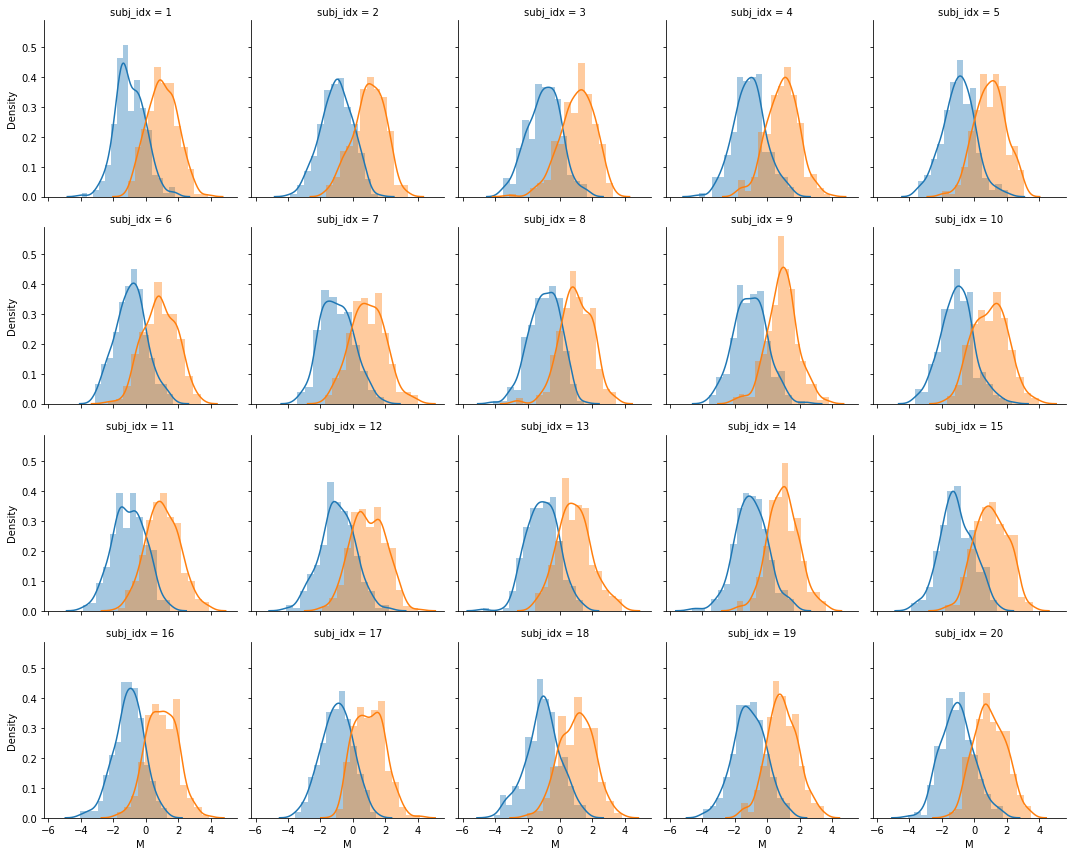

In [71]:
# see the separation
g = sns.FacetGrid(data=df, col='subj_idx', col_wrap=5, hue='X')
g.map(sns.distplot, 'M')

In [21]:
# DOES M DEPEND ON X (a-path)?
import statsmodels.formula.api as smf

md = smf.mixedlm("M ~ X", df, groups=df["subj_idx"])
mdf = md.fit()
print(mdf.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: M          
No. Observations: 10000   Method:             REML       
No. Groups:       20      Scale:              1.0022     
Min. group size:  500     Likelihood:         -14264.7734
Max. group size:  500     Converged:          No         
Mean group size:  500.0                                  
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.003     0.210  -0.016  0.987  -0.415   0.409
X           1.002     0.010  99.921  0.000   0.982   1.021
Group Var   0.882                                         



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2063: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2075: ConvergenceWarning: Gradient optimization failed, |grad| = 20.167517
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(se

In [89]:
##  ============================================================= ##
# plug into HDDMnn to simulate choices and RTs
##  ============================================================= ##

# help(hddm.simulators.hddm_dataset_generators.simulator_h_c)
# see https://hddm.readthedocs.io/en/latest/lan_tutorial.html#section-5-regressors 

model = 'ddm' # start simple
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = df, 
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None, #{'X': [-1, 1], 'S':[-1,1]}, 
                                                                                  depends_on = None, #{'v': ['X','S']},
                                                                                  regression_models = ['v ~ 1 + S + X'], 
                                                                                  #regression_covariates = ['S', 'X'],
                                                                                  regression_covariates = {'S': {'type': 'categorical', 'range': (-1, 1)},
                                                                                                           'X': {'type': 'categorical', 'range': (-1, 1)}},
                                                                                  group_only = None,
                                                                                  group_only_regressors = False,
                                                                                  fixed_at_default = None)


UnboundLocalError: ignored

In [75]:
# help(hddm.simulators.hddm_dataset_generators.simulator_h_c)
data
hddm.simulators.model_config[model]["params"]


['v', 'a', 'z', 't']

In [78]:
range(1)

range(0, 1)

In [61]:
# param_dict = {k: [x for x in v if 'reg' not in x] for k, v in full_parameter_dict.items()}
param_dict = {}
for key, value in full_parameter_dict.items():
    if 'reg' not in key:
        param_dict[key] = value
param_dict#
param_df = pd.DataFrame.from_dict(param_dict, orient='index').reset_index()
param_df


,index,0
0,a,1.354453
1,a_std,0.064919
2,t,0.513820
3,t_std,0.035220
4,a_subj.0,1.365104
...,...,...
127,t_subj.19,0.470334
128,z_Intercept_subj.19,0.284309
129,v_Intercept_subj.19,0.598479
130,v_S_subj.19,0.551195


In [51]:
key

'z_reg'

In [ ]:
# see https://colab.research.google.com/notebooks/io.ipynb#scrollTo=p2E4EKhCWEC5
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

In [ ]:
# which HDDMnn models exist?
import pprint
mm = hddm.model_config.model_config.keys()
pprint.pprint(list(mm))
# for m in mm:
#   print('\n\n' + m)
#   pprint.pprint(hddm.model_config.model_config[m])

['ddm_vanilla',
 'full_ddm_vanilla',
 'ddm',
 'angle',
 'weibull',
 'levy',
 'full_ddm',
 'ornstein',
 'ddm_sdv',
 'ddm_par2',
 'ddm_par2_no_bias',
 'ddm_par2_angle_no_bias',
 'ddm_par2_weibull_no_bias',
 'ddm_seq2',
 'ddm_seq2_no_bias',
 'ddm_seq2_angle_no_bias',
 'ddm_seq2_weibull_no_bias',
 'ddm_mic2_adj',
 'ddm_mic2_adj_no_bias',
 'ddm_mic2_adj_angle_no_bias',
 'ddm_mic2_adj_weibull_no_bias',
 'race_no_bias_3',
 'race_no_bias_angle_3',
 'race_no_bias_4',
 'race_no_bias_angle_4',
 'lca_no_bias_3',
 'lca_no_bias_angle_3',
 'lca_no_bias_4',
 'lca_no_bias_angle_4',
 'weibull_cdf',
 'full_ddm2']


In [ ]:
# Make HDDM Model to FIT

# Set up the regressor a regressor:
reg_model_v = {'model': 'v ~ 1 + stimulus + prevresp', 'link_func': lambda x: x}
reg_model_z = {'model': 'z ~ 1 + prevresp', 'link_func': lambda x: x}
reg_descr = [reg_model_z, reg_model_v]

hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.05,
                           is_group_model = True)
hddmnn_model.sample(nmcmc, burn = 100)

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)
plt.show()